In [13]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

# RGB Ground Truth Image Tiling

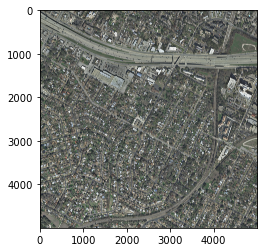

In [4]:
image_test = "../raw_data/AerialImageDataset/train/images/austin1.tif"
image_to_plot = Image.open(image_test)
plt.imshow(image_to_plot);

In [9]:
output_tiles = "../raw_data/train_RGB_tiles/"
train_dir = "../raw_data/AerialImageDataset/train/images/"
tile_height = 250
tile_width = 250
tile_size = (tile_width, tile_height)

In [10]:
%%time
def tile_split(img_directory,image_file, output_folder):
    ''' Function to take an input image and tile it with no overlap/strides
        ensure following is specified:
           - input image directory
           - individual image files
           - the desired output folder
    '''
    
    # Read in image file and convert to numpy array
    filepath = img_directory+image_file
    image = Image.open(filepath)
    image = np.asarray(image)
    
    # from np array, get image total width and height
    img_height, img_width, channels = image.shape

    # create numpy array of zeros to fill in from the image data
    tiled_array = np.zeros((img_height // tile_height,
                           img_width // tile_width,
                           tile_height,
                           tile_width,
                           channels))
    
    # initialise at 0 for x and y positions
    # then loop through adding the tiles
    y = x = 0
    for i in range(0, img_height, tile_height):
        for j in range(0, img_width, tile_width):
            tiled_array[y][x] = image[i:i+tile_height,
                                      j:j+tile_width,
                                      :channels]
            x += 1
        y += 1
        x = 0
    
    # output tiled images to specified folder
    # first read image name
    image_name = image_file.split(".")[0]
    
    # loop through images contained in the array
    for ximg in range(tiled_array.shape[0]):
        for yimg in range(tiled_array.shape[1]):
                # give custom name to each image and then save each
                # in specified location
                tile_name = f"{image_name}_x{ximg:02d}_y{yimg:02d}.tif"
                im = Image.fromarray(tiled_array[ximg][yimg].astype(np.uint8))
                im.save(output_tiles+tile_name)
    
    return print(f"completed tiling {image_name}")

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


In [11]:
train_images = os.listdir(train_dir)
len(train_images)

180

## Processing

In [12]:
%%time
for img in train_images:
    tile_split(train_dir,img, output_tiles)

completed tiling chicago4
completed tiling tyrol-w35
completed tiling vienna30
completed tiling vienna17
completed tiling austin30
completed tiling vienna3
completed tiling tyrol-w28
completed tiling chicago30
completed tiling chicago24
completed tiling chicago7
completed tiling vienna23
completed tiling tyrol-w9
completed tiling kitsap14
completed tiling chicago28
completed tiling chicago14
completed tiling kitsap27
completed tiling austin8
completed tiling austin35
completed tiling vienna12
completed tiling vienna7
completed tiling chicago23
completed tiling vienna21
completed tiling vienna34
completed tiling chicago32
completed tiling tyrol-w2
completed tiling austin34
completed tiling austin17
completed tiling vienna2
completed tiling tyrol-w24
completed tiling kitsap31
completed tiling vienna14
completed tiling kitsap2
completed tiling vienna25
completed tiling austin21
completed tiling austin31
completed tiling tyrol-w11
completed tiling austin24
completed tiling tyrol-w18
comple

## Testing images

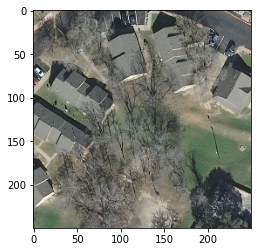

In [35]:
image_rgb_tile = "../raw_data/train_RGB_tiles/austin2_x10_y05.tif"
image_rgb_tile = Image.open(image_rgb_tile)
plt.imshow(image_rgb_tile);

# Greyscale Mask Tiling

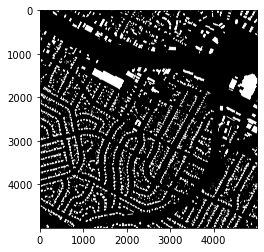

In [5]:
image_test2 = "../raw_data/AerialImageDataset/train/gt/austin1.tif"
image_to_plot2 = Image.open(image_test2)
plt.imshow(image_to_plot2,cmap='gray');

In [37]:
output_tiles = "../raw_data/train_mask_tiles/"
train_dir = "../raw_data/AerialImageDataset/train/gt/"
tile_height = 250
tile_width = 250
tile_size = (tile_width, tile_height)

In [18]:
%%time
def tile_split_masks(img_directory,image_file, output_folder):
    ''' Function to take an input image and tile it with no overlap/strides
        ensure following is specified:
           - input image directory
           - individual image files
           - the desired output folder
    '''
    
    # Read in image file and convert to numpy array
    filepath = img_directory+image_file
    image = Image.open(filepath)
    image = np.asarray(image)
    
    # from np array, get image total width and height
    img_height, img_width = image.shape

    # create numpy array of zeros to fill in from the image data
    tiled_array = np.zeros((img_height // tile_height,
                           img_width // tile_width,
                           tile_height,
                           tile_width))
    
    # initialise at 0 for x and y positions
    # then loop through adding the tiles
    y = x = 0
    for i in range(0, img_height, tile_height):
        for j in range(0, img_width, tile_width):
            tiled_array[y][x] = image[i:i+tile_height,
                                      j:j+tile_width]
            x += 1
        y += 1
        x = 0
    
    # output tiled images to specified folder
    # first read image name
    image_name = image_file.split(".")[0]
    
    # loop through images contained in the array
    for ximg in range(tiled_array.shape[0]):
        for yimg in range(tiled_array.shape[1]):
                # give custom name to each image and then save each
                # in specified location
                tile_name = f"{image_name}_mask_x{ximg:02d}_y{yimg:02d}.tif"
                im = Image.fromarray(tiled_array[ximg][yimg].astype(np.uint8))
                im.save(output_tiles+tile_name)
    
    return print(f"completed tiling {image_name}")

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.87 µs


In [16]:
gt_images = os.listdir(train_dir)
len(gt_images)

181

### Cleaning list

In [21]:
gt_images.remove(".ipynb_checkpoints")

In [22]:
".ipynb_checkpoints" in gt_images

False

In [23]:
len(gt_images)

180

## Processing masks

In [24]:
%%time
for img in gt_images:
    tile_split_masks(train_dir,img, output_tiles)

completed tiling chicago4
completed tiling tyrol-w35
completed tiling vienna30
completed tiling vienna17
completed tiling austin30
completed tiling vienna3
completed tiling tyrol-w28
completed tiling chicago30
completed tiling chicago24
completed tiling chicago7
completed tiling vienna23
completed tiling tyrol-w9
completed tiling kitsap14
completed tiling chicago28
completed tiling chicago14
completed tiling kitsap27
completed tiling austin8
completed tiling austin35
completed tiling vienna12
completed tiling vienna7
completed tiling chicago23
completed tiling vienna21
completed tiling vienna34
completed tiling chicago32
completed tiling tyrol-w2
completed tiling austin34
completed tiling austin17
completed tiling vienna2
completed tiling tyrol-w24
completed tiling kitsap31
completed tiling vienna14
completed tiling kitsap2
completed tiling vienna25
completed tiling austin21
completed tiling austin31
completed tiling tyrol-w11
completed tiling austin24
completed tiling tyrol-w18
comple

## Testing images

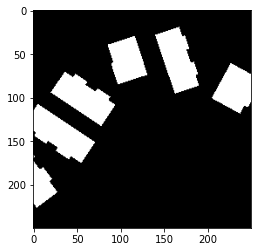

In [36]:
image_rgb_tile = "../raw_data/test_mask_tiles/austin2_mask_x10_y05.tif"
image_rgb_tile = Image.open(image_rgb_tile)
plt.imshow(image_rgb_tile,cmap='gray');

# Test set

In [38]:
output_tiles = "../raw_data/test_RGB_tiles/"
train_dir = "../raw_data/AerialImageDataset/test/images/"
tile_height = 250
tile_width = 250
tile_size = (tile_width, tile_height)

In [40]:
test_images = os.listdir(train_dir)
len(test_images)

180

## Processing images

In [41]:
%%time
for img in test_images:
    tile_split(train_dir,img, output_tiles)

completed tiling innsbruck26
completed tiling bellingham26
completed tiling innsbruck27
completed tiling sfo21
completed tiling innsbruck16
completed tiling bellingham33
completed tiling innsbruck32
completed tiling bloomington8
completed tiling innsbruck33
completed tiling bloomington24
completed tiling bellingham8
completed tiling bloomington29
completed tiling innsbruck35
completed tiling bellingham32
completed tiling bloomington14
completed tiling sfo33
completed tiling bloomington30
completed tiling sfo4
completed tiling sfo24
completed tiling tyrol-e8
completed tiling innsbruck6
completed tiling bellingham18
completed tiling bellingham29
completed tiling bellingham14
completed tiling bellingham22
completed tiling bellingham35
completed tiling bloomington26
completed tiling bloomington7
completed tiling bloomington19
completed tiling bloomington1
completed tiling tyrol-e2
completed tiling tyrol-e7
completed tiling bloomington10
completed tiling bloomington2
completed tiling innsbr

# CustomDataGen

In [43]:
train_RGB_list = os.listdir("../raw_data/train_RGB_tiles/")
len(train_RGB_list)

72000

In [51]:
import math

In [53]:
math.ceil(len(train_RGB_list)/31)

2323

In [54]:
len(train_RGB_list)/31

2322.5806451612902

In [117]:
from tensorflow import keras
import numpy as np
import math
from skimage.transform import resize
from PIL import Image

class CustomDataLoader(keras.utils.Sequence):
    """ Allow custom data import and output from image files for masking """
    
    def __init__(self, x_images, x_path, y_masks, y_path, image_size, batch_size):
        """
        x_images     is a list of RGB images in a directory
        x_path       is the path for the images
        y_masks      is a list of greyscale masks in a directory
        y_path       is the path for the image masks
        image_size   tuple of image size e.g. (250,250)
        batch_size   size of the batches e.g. 16, 32 etc.
        """
        self.x, self.y = x_images, y_masks
        self.x_path, self.y_path = x_path, y_path
        self.image_size = image_size
        self.batch_size = batch_size
    
    def __len__(self):
        """
        return the number of batches required for the amount of
        images in x_images
        """
        return math.ceil(len(self.x) / self.batch_size)
    
    def __getitem__(self,batch_index_position):
        # batch_index_position denotes start of current batch
        # current_index determines end index of current batch
        current_index = batch_index_position * self.batch_size
        
        # create lists of the x and y image names in the current batch
        batch_x = self.x[batch_index_position:current_index+1]
        batch_y = self.y[batch_index_position:current_index+1]
        
        # create numpy array of x images
        # first initalise a numpy array of zeros to fill
        # with 3 channels for RGB
        x = np.zeros((self.batch_size,self.image_size,3))
        for i, ximg in enumerate(batch_x):
            x[i] = np.asarray(Image.open(self.x_path+ximg))
                     
        # same procedure for grayscale y images (no channels)
        y = np.zeros((self.batch_size,self.image_size))
        for i, yimg in enumerate(batch_y):
            y[i] = np.asarray(Image.open(self.y_path+yimg))
                     
        # resizing
        resized_size = (224,224)
        x_resized = [resize(i,resized_size) for i in x]
        y_resized = [resize(j,resized_size) for j in y]
        
        return (x_resized, y_resized)
                     
        

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: initialization failed

In [119]:
# from tensorflow import keras

In [99]:
test_x_list = os.listdir("../raw_data/dataloader_testing/train/")
# test_x_list

In [79]:
for i,zz in enumerate(test_x_list):
    print(i,zz)

0 austin1_x10_y04.tif
1 austin1_x10_y00.tif
2 austin1_x10_y18.tif
3 austin1_x10_y07.tif
4 austin1_x10_y05.tif
5 austin1_x10_y09.tif
6 austin1_x10_y12.tif
7 austin1_x10_y10.tif
8 austin1_x10_y11.tif
9 austin1_x10_y17.tif
10 austin1_x10_y13.tif
11 austin1_x10_y03.tif
12 austin1_x10_y15.tif
13 austin1_x10_y02.tif
14 austin1_x10_y14.tif
15 austin1_x10_y01.tif
16 austin1_x10_y06.tif
17 austin1_x10_y08.tif
18 austin1_x10_y19.tif
19 austin1_x10_y16.tif


In [62]:
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 54.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 84.2 MB/s eta 0:00:00:00:01


In [65]:
from skimage import io
from PIL import Image

In [68]:
img1_file = f"../raw_data/dataloader_testing/train/{test_x_list[0]}"
img1_file

'../raw_data/dataloader_testing/train/austin1_x10_y04.tif'

In [72]:
img1 = np.asarray(Image.open(img1_file))
# img1 = np.asarray(img1)
img1.shape

(250, 250, 3)

In [73]:
test_x = np.zeros((16,250,250,3))
test_x.shape

(16, 250, 250, 3)

In [120]:
for zz in test_x:
    print(zz.shape)

(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)


In [87]:
skimg = io.imread(img1_file)
skimg.shape

(250, 250, 3)

In [112]:
xxx = np.zeros((1,2,3))
xxx

array([[[0., 0., 0.],
        [0., 0., 0.]]])

In [105]:
# skimg

In [84]:
from skimage.transform import resize

In [91]:
imgresize = resize(skimg,(200,200))

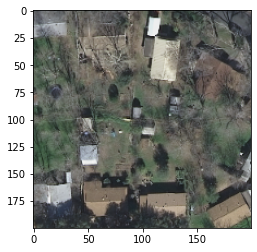

In [94]:
plt.imshow(imgresize);

In [97]:
plt.imshow(img1_file);

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [106]:
imgresize.shape

(200, 200, 3)

In [121]:
!pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.5/497.5 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 3.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 17.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.2 MB/s eta 0:00:00:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.0
    Uninstalling tensorboard-2.9.0:
      Successfully uninstalled tensorboard-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1
